In [64]:
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import scipy as sci

In [65]:
f = sorted(g.glob('out_US*'))
print(f)

['out_US_isostrat_001x', 'out_US_isostrat_002x', 'out_US_isostrat_004x', 'out_US_isostrat_008x', 'out_US_isostrat_016x']


In [52]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [53]:
def lbl_output_read(file, jump=1):
    rad = np.empty(0)
    nu = np.empty(0)
    
    fi = open(file, 'r')
    lines = fi.readlines()[59:]
    
    nlev = len(lines)

    for j in range(0,nlev,jump):
       tmp = lines[j];
       sp = tmp.split();
       rad = np.append(rad, sp[1])
       nu = np.append(nu, sp[0])  
    fi.close()

    nu = np.array([float(x) for x in nu])
    rad = np.array([float(y) for y in rad])

    return nu, rad

In [54]:
nu = []
rad = []
for i in range(len(f)):
    w, r = lbl_output_read(f[i])
    nu.append(w)
    rad.append(r)

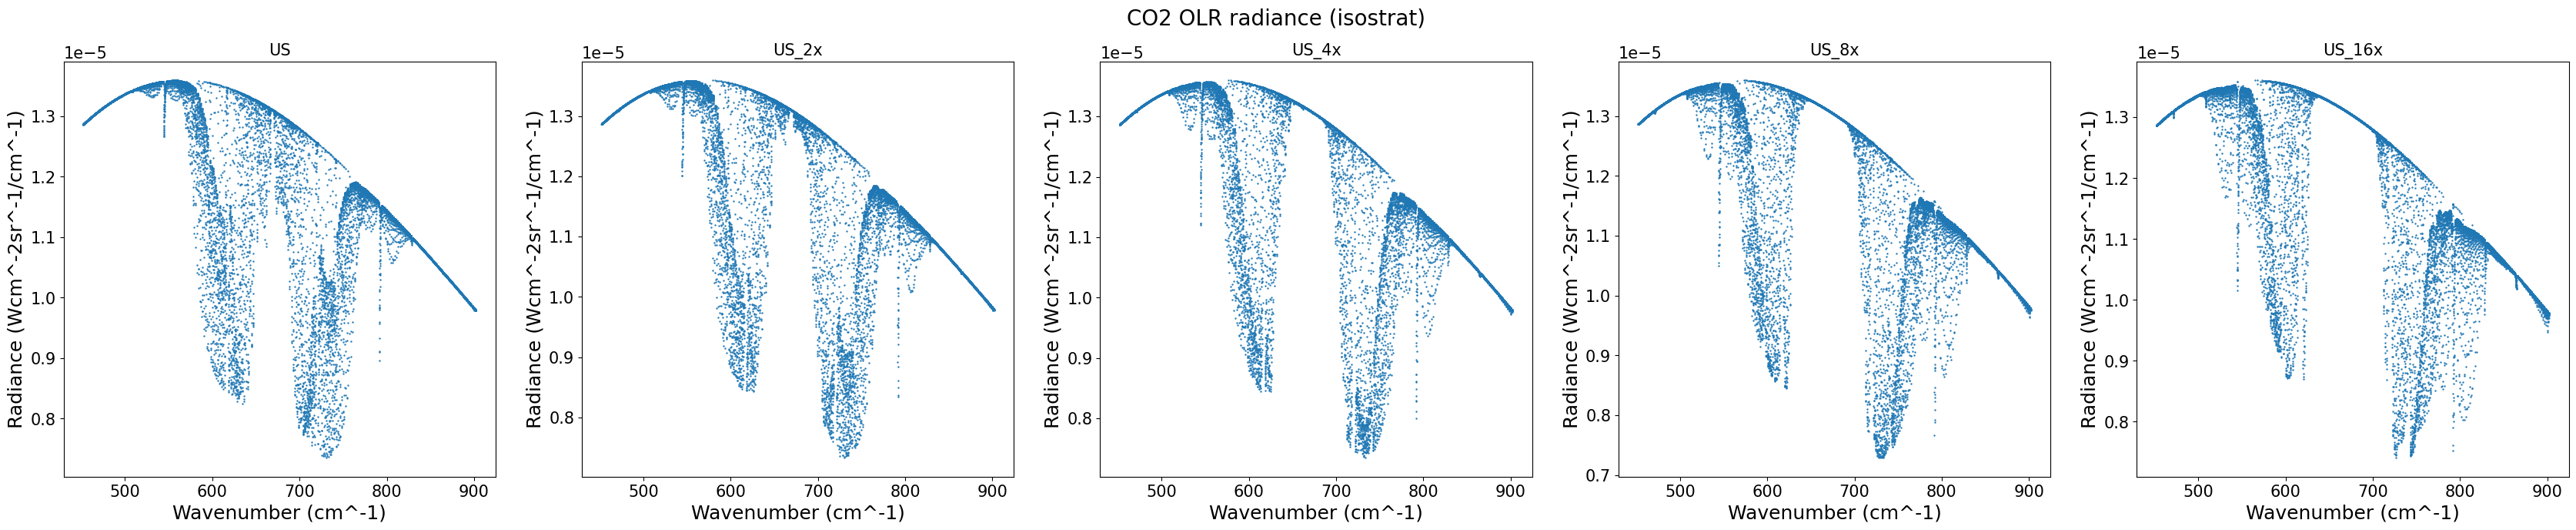

In [55]:
scenario = ['US', 'US_2x', 'US_4x', 'US_8x', 'US_16x']
# scenario = ['TROP','TROP_2x','TROP_4x','TROP_8x', 'TROP_16x']
fig, axs = plt.subplots(1,len(scenario),figsize=(42,7))
fig.suptitle('CO2 OLR radiance (isostrat)')
# fig.suptitle('CO2 tropopause upwelling radiance (isostrat)')
for i in range(len(f)):
    axs[i].scatter(nu[0],rad[i], s=0.5)
    axs[i].set_xlabel('Wavenumber (cm^-1)')
    axs[i].set_ylabel('Radiance (Wcm^-2sr^-1/cm^-1)')
    axs[i].set_title(scenario[i])
plt.savefig('US_CO2_isostrat.png')
# plt.savefig('TROP_CO2_isostrat.png')
# plt.savefig('TROP_CO2_isostrat_tp.png')


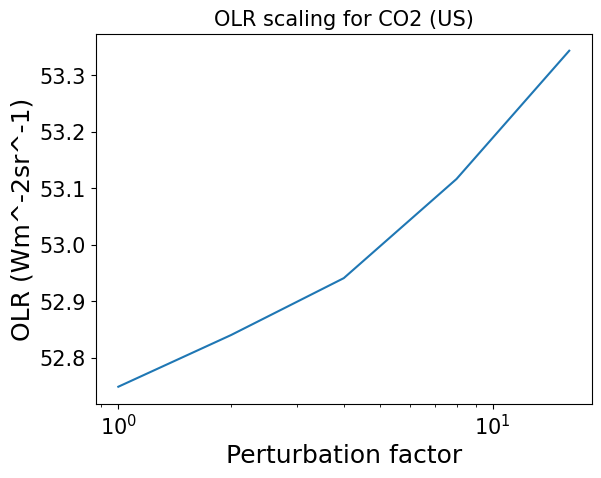

In [56]:
radsum = []
dv = nu[0][1]-nu[0][0]
for i in range(0,len(rad)):
    t = np.sum(rad[i])*dv
    radsum.append(t*10**4)
# keys = scenario
# dict_rad = dict(zip(keys, radsum))

# print(dict_rad)
arr = [1,2,4,8,16]
plt.plot(arr, radsum)
plt.xscale('log')
plt.xlabel('Perturbation factor')
plt.ylabel('OLR (Wm^-2sr^-1)')
plt.title('OLR scaling for CO2 (US)')
# plt.title('OLR scaling for CO2 (TROP)')
# plt.title('tropopause scaling for CO2 (TROP)')
# plt.savefig('CO2_tp_scaling_TROP.png')
# plt.savefig('CO2_OLR_scaling_TROP.png')
plt.savefig('CO2_OLR_scaling_US.png')

In [66]:
bandmid=np.array(np.where((nu[0]<700) & (nu[0]>630))) #CO2 band center, from Chen-Merlis-Huang (2024)
radsum_mid = []
dv = nu[0][1]-nu[0][0]
for i in range(0,len(rad)):
    t = np.sum(rad[i][bandmid[0][0]:bandmid[0][-1]+1])*dv
    radsum_mid.append(t*10**4)

In [ ]:
def reg(x,a,b):
    return a*np.log(x)+b

arr = [1,2,4,8,16]
plt.plot(arr, radsum_mid)
plt.xscale('log')
plt.xlabel('Perturbation factor')
plt.ylabel('OLR (Wm^-2sr^-1)')
# plt.title('OLR scaling for CO2 band center (TROP)')
plt.title('OLR scaling for CO2 band center (US)')
# plt.title('tropopause scaling for CO2 band center (TROP)')

popt, pcov = sci.optimize.curve_fit(test, arr)
# plt.savefig('CO2mid_tp_scaling_TROP.png')
# plt.savefig('CO2mid_OLR_scaling_TROP.png')
plt.savefig('CO2mid_OLR_scaling_US.png')